In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip list

In [2]:
import tensorflow as tf
import os

In [3]:
# search for training dataset
os.listdir('drive/MyDrive/AI/training_set_with_labels')

['1', '0', '8', '2', '7', '9', '5', '4', '3', '6']

In [4]:
# limit the GPI usage
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

#**Load Training Images**

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# this is the root directory to all the training datasets
data_dir = 'drive/MyDrive/AI/training_set_with_labels'

In [7]:
# this is how the images can be convert to binary images
img = cv2.imread('drive/MyDrive/AI/training_set_with_labels/8/70_resized.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 1, cv2.THRESH_BINARY)
print(binary_image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 

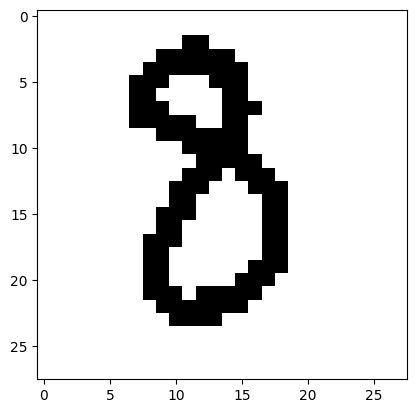

In [8]:
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [9]:
# load all the training dataset with a data pipeline using tensorflow
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=20, image_size=(28, 28))

Found 500 files belonging to 10 classes.


In [10]:
# Divide the pixel values by 255 scales them to the range of 0 to 1
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [11]:
print(batch[0].shape)
print(len(data))

(20, 28, 28, 3)
25


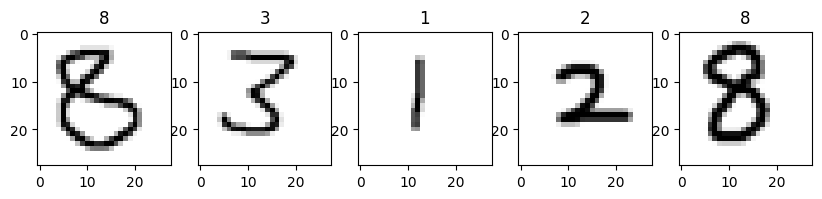

In [12]:
# visualise a few training set using matplotlib
fig, ax = plt.subplots(ncols=5, figsize=(10, 10))
for index, image in enumerate(batch[0][:5]):
  ax[index].imshow(image)
  ax[index].title.set_text(batch[1][index])

In [13]:
batch = scaled_iterator.next()

In [14]:
batch[0].shape # one data batch consist of 20 images with 28*28 dimension and 3 color channels

(20, 28, 28, 3)

# **Split Data into Training, Validation and Testing Sets**

In [15]:
len(data)

25

In [16]:
train_size = int(len(data)*.7) # 70% of the data is used for training the model
val_size = int(len(data)*.2) # 20% of the data is used for validation the model
test_size = int(len(data)*.1) # 10% of the data is used for testing the model

In [17]:
train_size

17

In [18]:
train = data.take(train_size) # split the data for training set
val = data.skip(train_size).take(val_size) # split the data for validation set
test = data.skip(train_size + val_size).take(test_size) # split the data for testing set

In [19]:
print(train)
len(train)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


17

# **Build a Deep Learning Model**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

# adding 4 convolutional layer
# 128 3*3 kernels
# the kernel slide 1 pixel each step
model.add(Conv2D(128, (4, 4), 1, activation='relu', input_shape=(28, 28, 3)))
model.add(Conv2D(128, (4, 4), 1, activation='relu'))
model.add(Conv2D(128, (4, 4), 1, activation='relu'))
model.add(Conv2D(128, (4, 4), 1, activation='relu'))
# adding 1 max pooling layer
model.add(MaxPooling2D())
# adding 1 faltten layer
model.add(Flatten())
# adding 3 dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# there will be 10 classes for output layer
# the output layer uses softmax activation function to get a total output probability of 1 for all classes
# sigmoid cannot be used as the output layer because it is not a binary classification

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# the model compiles with adam optimizer
# sparse_categorical_crossentropy is used as the loss function instead of categorical_crossentropy
# this is because the labels of the classification are integer and not a one-hot array containing the probable match for each category
# accuracy metrics is used for evaluation of the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_18 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
log_dir = 'drive/MyDrive/AI/log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
train_cardinality = tf.data.experimental.cardinality(train).numpy()
print("Training set size:", train_cardinality)

# Iterate over the "train" dataset and print the content
for image, label in train:
    # Print image shape
    print("Image shape:", image.shape)
    # Print label value
    print("Label:", label)

Training set size: 17
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([7 2 4 7 8 4 0 0 3 7 1 4 0 9 1 9 1 8 6 0], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([5 6 0 6 0 4 2 6 9 2 0 5 9 5 0 8 4 1 0 8], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([2 6 6 8 7 2 1 1 6 5 3 8 9 3 6 4 0 5 8 4], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([0 7 4 5 7 8 0 1 1 5 5 9 4 0 8 1 1 7 1 2], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([9 0 0 5 8 0 4 4 7 8 4 7 4 3 5 7 4 7 9 6], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([8 6 5 5 4 9 6 1 6 7 0 1 9 3 5 3 9 4 3 2], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([7 7 9 8 3 5 7 7 8 1 9 9 5 6 7 8 5 4 6 5], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([4 4 5 5 3 0 3 6 5 3 9 1 6 4 2 8 4 8 8 1], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([4 9 2 1 3 3

In [ ]:
# fit the training dataset to the model with 10 epochs
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
17/17 [==============================] - 20s 1s/step - loss: 0.0341 - accuracy: 0.9853 - val_loss: 0.0800 - val_accuracy: 0.9900
Epoch 2/10
17/17 [==============================] - 22s 1s/step - loss: 0.0295 - accuracy: 0.9941 - val_loss: 0.1281 - val_accuracy: 0.9600
Epoch 3/10
17/17 [==============================] - 21s 1s/step - loss: 0.0702 - accuracy: 0.9824 - val_loss: 0.0837 - val_accuracy: 0.9700
Epoch 4/10
17/17 [==============================] - 21s 1s/step - loss: 0.0532 - accuracy: 0.9882 - val_loss: 0.0202 - val_accuracy: 0.9900
Epoch 5/10
17/17 [==============================] - 22s 1s/step - loss: 0.0405 - accuracy: 0.9853 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 6/10
17/17 [==============================] - 21s 1s/step - loss: 0.0215 - accuracy: 0.9912 - val_loss: 0.0556 - val_accuracy: 0.9900
Epoch 7/10
17/17 [==============================] - 20s 1s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/10
17/17 [==

In [ ]:
hist.history

{'loss': [0.03411915898323059,
  0.029505597427487373,
  0.07017377763986588,
  0.05324811860918999,
  0.040481336414813995,
  0.021454667672514915,
  0.0042796372435987,
  0.0007485368405468762,
  0.00020986532035749406,
  0.0004340014420449734],
 'accuracy': [0.9852941036224365,
  0.9941176176071167,
  0.9823529124259949,
  0.9882352948188782,
  0.9852941036224365,
  0.9911764860153198,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.07999814301729202,
  0.12811799347400665,
  0.08369387686252594,
  0.02018771320581436,
  0.02849770523607731,
  0.05557156726717949,
  0.003264050465077162,
  0.025439299643039703,
  0.001000624499283731,
  0.0005450728931464255],
 'val_accuracy': [0.9900000095367432,
  0.9599999785423279,
  0.9700000286102295,
  0.9900000095367432,
  0.9900000095367432,
  0.9900000095367432,
  1.0,
  0.9900000095367432,
  1.0,
  1.0]}

# **Plot Model Performances**

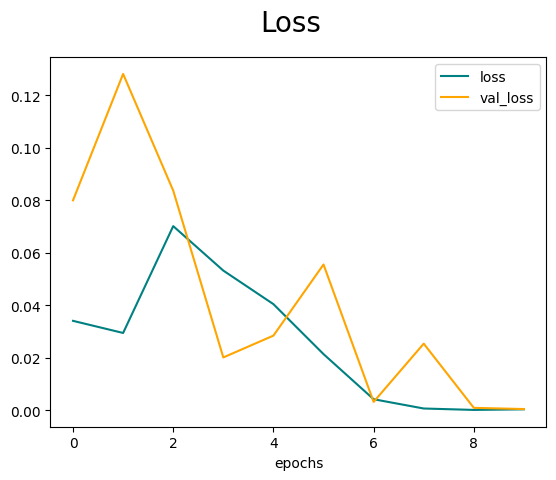

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.xlabel('epochs')
plt.show()

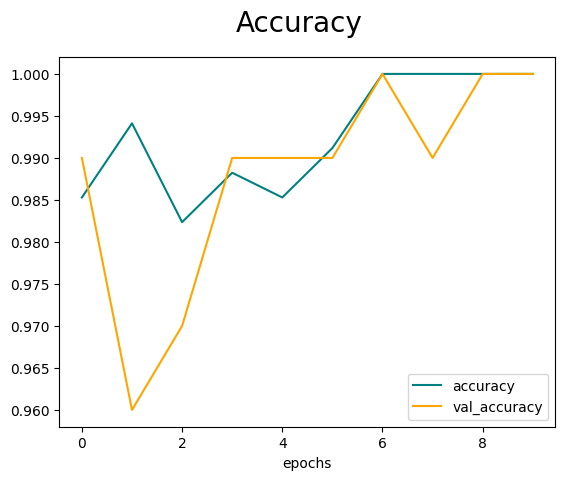

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('epochs')
plt.show()

# **Evaluation of Model**

In [21]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [22]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  y_pred = model.predict(X)
  y_pred_classes = tf.argmax(y_pred, axis=1)
  pre.update_state(y, y_pred_classes)
  re.update_state(y, y_pred_classes)
  acc.update_state(y, y_pred_classes)

1/1 [==============================] - 0s 225ms/step


In [ ]:
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


# **Testing of Model**

In [24]:
import cv2
import matplotlib.pyplot as plt

[['drive/MyDrive/AI/test_set_with_labels/0/YO_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/HT_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/CY_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/ZY_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/YJ_0_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/1/HT_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/YO_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/CY_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/YJ_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/ZY_1_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/2/HT_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/YJ_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/YO_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/ZY_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/CY_2_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/3/YO_3_resized.png', 'drive/MyDrive/AI/test_set_with_

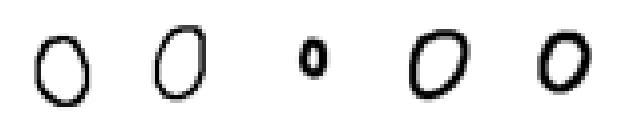

drive/MyDrive/AI/test_set_with_labels/1/HT_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/YO_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/CY_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/YJ_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/ZY_1_resized.png


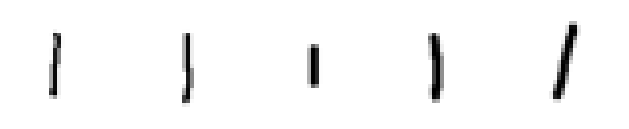

drive/MyDrive/AI/test_set_with_labels/2/HT_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/YJ_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/YO_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/ZY_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/CY_2_resized.png


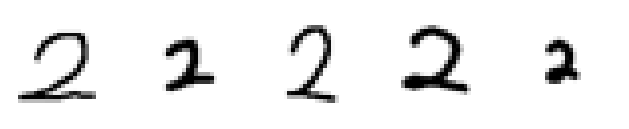

drive/MyDrive/AI/test_set_with_labels/3/YO_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/YJ_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/HT_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/CY_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/ZY_3_resized.png


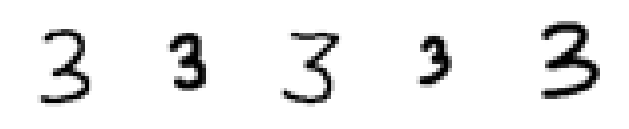

drive/MyDrive/AI/test_set_with_labels/4/HT_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/YO_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/YJ_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/CY_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/ZY_4_resized.png


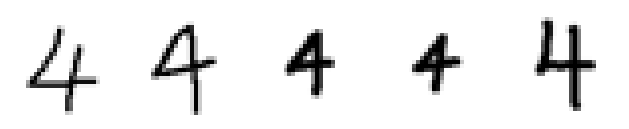

drive/MyDrive/AI/test_set_with_labels/5/HT_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/YJ_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/YO_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/ZY_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/CY_5_resized.png


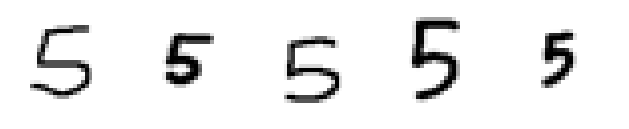

drive/MyDrive/AI/test_set_with_labels/6/HT_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/YO_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/CY_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/YJ_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/ZY_6_resized.png


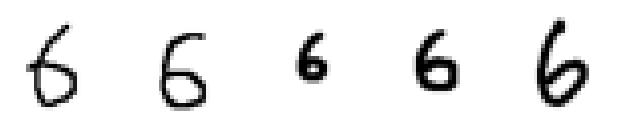

drive/MyDrive/AI/test_set_with_labels/7/YO_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/YJ_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/HT_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/ZY_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/CY_7_resized.png


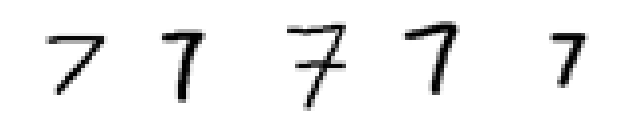

drive/MyDrive/AI/test_set_with_labels/8/HT_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/YO_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/YJ_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/CY_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/ZY_8_resized.png


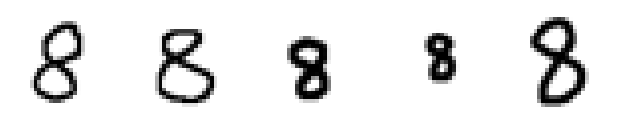

drive/MyDrive/AI/test_set_with_labels/9/HT_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/YO_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/CY_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/ZY_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/YJ_9_resized.png


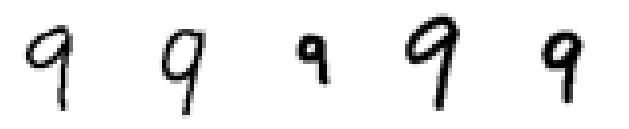

In [23]:
testing_dir = 'drive/MyDrive/AI/test_set_with_labels'
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY']

testing_files = []

# load the testing dataset to test the accuracy of the trained model
for i in range(10):
  temp = []
  curr_dir = f'{testing_dir}/{i}'
  for filename in os.listdir(curr_dir):
    # Check if the file has an image extension
    if filename.endswith('.png'):
      # Create the full file path
      file_path = os.path.join(curr_dir, filename)
      # Append the file path to the list
      temp.append(file_path)

  testing_files.append(temp)

print(testing_files)
print(len(testing_files))

loaded_images = []

for i in range(len(testing_files)):
    temp = []
    fig, axes = plt.subplots(1, 5)

    # Display each image in a separate subplot
    for j in range(len(testing_files[i])):
      print(testing_files[i][j])
      img = cv2.imread(testing_files[i][j])
      temp.append(img)
      # Display the image on the subplot
      axes[j].imshow(img)
      # Remove the axis labels for each subplot
      axes[j].axis('off')

    loaded_images.append(temp)
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the figure
    plt.show()

In [ ]:
pred_res = []

for i in range(len(loaded_images)):
  print(f'iteration: {i}')
  temp = []
  for j in range(len(loaded_images[i])):
    y_pred = model.predict(np.expand_dims(loaded_images[i][j]/255, 0))
    y_pred_classes = tf.argmax(y_pred, axis=1)
    print(y_pred)
    print(y_pred_classes)
    temp.append(int(y_pred_classes))
  pred_res.append(temp)

print(pred_res)

iteration: 0
1/1 [==============================] - 0s 43ms/step
[[9.9984372e-01 3.1197359e-16 2.0487664e-07 2.2997231e-11 6.5456374e-09
  5.6824882e-14 4.2152650e-09 3.7832980e-13 1.5597443e-04 5.1866766e-12]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 49ms/step
[[9.3777525e-01 1.9116081e-13 5.2203193e-02 1.6748200e-07 1.9771763e-07
  3.8849582e-13 2.1740540e-09 1.4356144e-05 1.0000879e-02 5.9456315e-06]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 39ms/step
[[9.0621769e-01 1.1455526e-07 7.1559843e-05 1.5279790e-06 7.2780843e-03
  5.3087929e-06 1.4516750e-02 6.4087919e-07 1.4542723e-02 5.7365596e-02]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 39ms/step
[[1.00000000e+00 2.53374173e-26 9.17224196e-13 1.71456936e-22
  1.08229304e-16 3.57889721e-23 1.54432879e-15 1.07090718e-19
  7.16397192e-19 1.55889486e-23]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==================

In [ ]:
# count the accuracy based on the total correct predictions
accuracy_count = 0

for i in range(10):
  for j in range(5):
    if i == pred_res[i][j]:
      accuracy_count+=1

print(f'Accuracy: {accuracy_count/50*100}%')

Accuracy: 100.0%


# **Save the Model**

In [31]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('drive/MyDrive/AI/models', 'digit_recognition_model.h5'))

In [32]:
new_model = load_model(os.path.join('drive/MyDrive/AI/models', 'digit_recognition_model.h5'))

# Get Explainer for the Digit Recognition Model

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade shap

In [ ]:
import glob
from PIL import Image
import shap
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


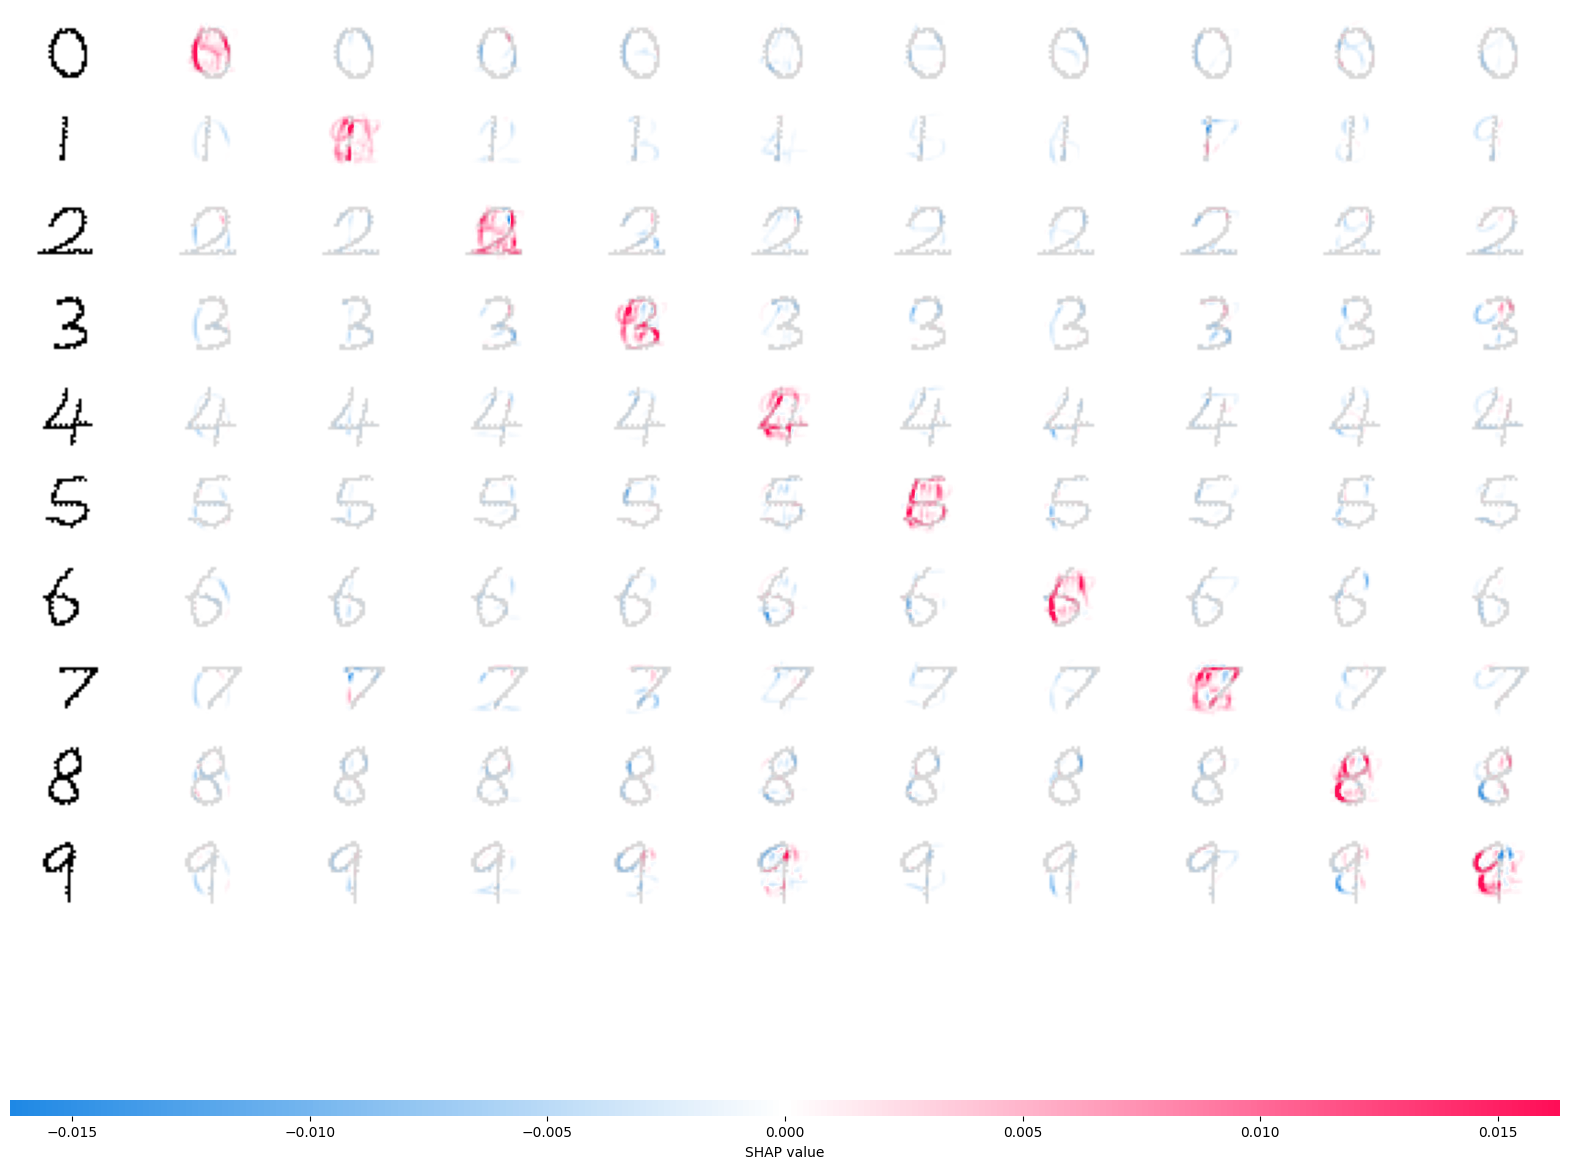

In [ ]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))  # Resize image

    img_rgb = img.convert('RGB')  # Convert to RGB for model
    img_rgb = np.array(img_rgb)  # Convert image to array
    img_rgb = img_rgb / 255.0  # Normalize
    img_rgb = np.expand_dims(img_rgb, 0)  # Add batch dimension

    img_bin = img.convert('1')  # Convert to binary for visualization
    img_bin = np.array(img_bin, dtype=np.int32)  # Convert image to integer array

    return img_rgb, img_bin


samples_per_class = 1  # We only need one representative sample per class
representative_samples = []
representative_images = []

# Load one image per class from each class folder
for i in range(10):
    image_paths = glob.glob(f'{testing_dir}/{i}/*_resized.png')[:samples_per_class]
    for path in image_paths:
        img_rgb, img_bin = load_and_preprocess_image(path)
        representative_samples.append(img_rgb)
        representative_images.append(np.expand_dims(img_bin, -1))  # Add an extra dimension for grayscale

# Convert to Tensor for compatibility with SHAP
to_explain = tf.convert_to_tensor(np.concatenate(representative_samples))

# Convert representative_images to a numpy array and invert the colors
representative_images = 1 - np.array(representative_images)

# Convert representative_images to a numpy array
representative_images = np.array(representative_images)

# Create an explainer object
explainer = shap.DeepExplainer(new_model, to_explain)

# Calculate SHAP values
shap_values = explainer.shap_values(to_explain)

shap.image_plot(shap_values, -representative_images)

#**Train model to detect handwriting based on the recognised input digit**

## in the next handwritting detection, each member is given a number as their classes.

*   0: Chen Ching Yen (CY)
*   1: Wong Yan Jian (YJ)
*   2: Yap Yun Onn (YO)
*   3: Lim Hon Ting (HT)
*   4: Lim Zheng Yu (ZY)

In [26]:
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY']

In [27]:
data_dir = 'drive/MyDrive/AI/training_set_for_each_digit'

In [28]:
print(f'Modal: {0}')
curr_dir = f'{data_dir}/{0}_classification'
print(curr_dir)
data = tf.keras.utils.image_dataset_from_directory(curr_dir, batch_size=10, image_size=(28, 28))


data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

print(train_size)
print(val_size)

Modal: 0
drive/MyDrive/AI/training_set_for_each_digit/0_classification
Found 50 files belonging to 5 classes.
3
1


Modal: 0
drive/MyDrive/AI/training_set_for_each_digit/0_classification
Found 50 files belonging to 5 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_18 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_4

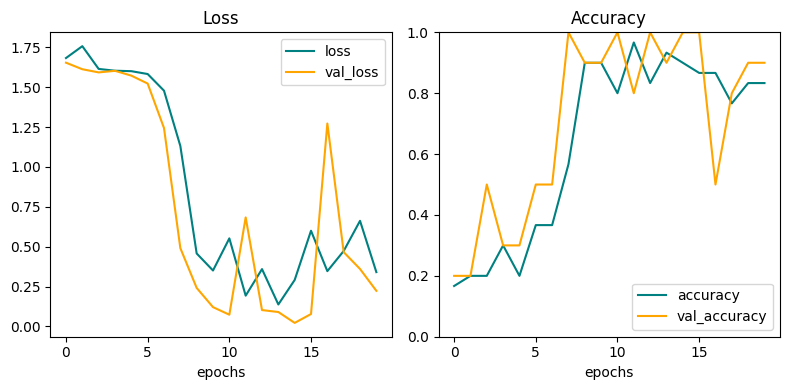

Modal: 1
drive/MyDrive/AI/training_set_for_each_digit/1_classification
Found 50 files belonging to 5 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_22 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_5

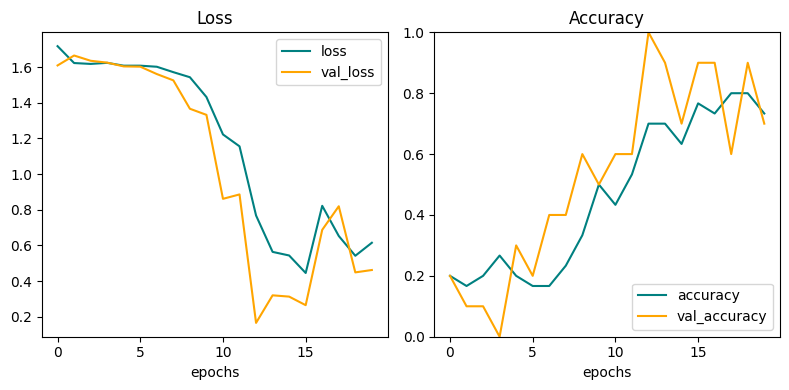

Modal: 2
drive/MyDrive/AI/training_set_for_each_digit/2_classification
Found 50 files belonging to 5 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_26 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_6

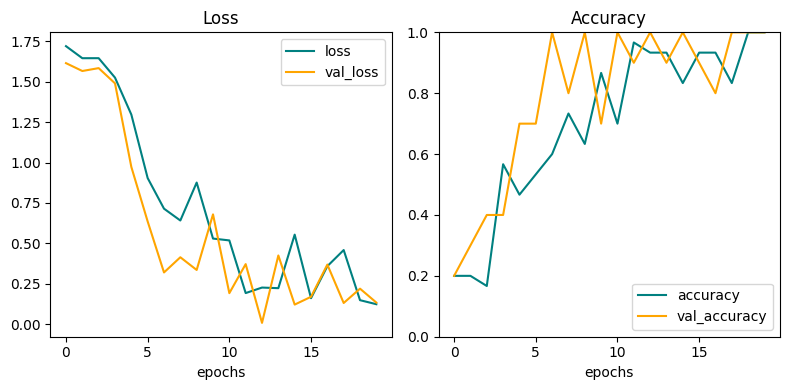

Modal: 3
drive/MyDrive/AI/training_set_for_each_digit/3_classification
Found 50 files belonging to 5 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_29 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_30 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_7

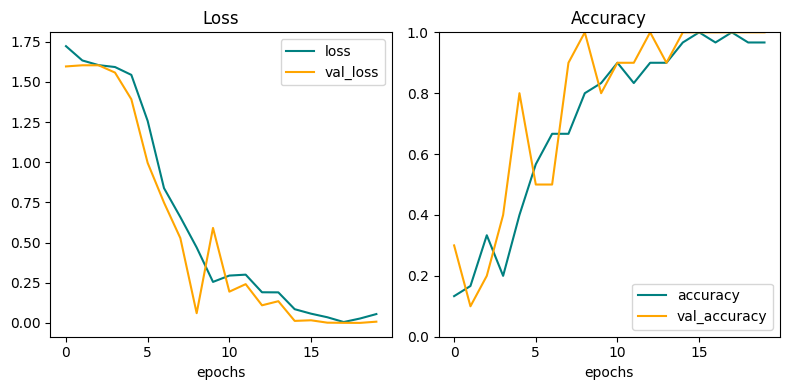

Modal: 4
drive/MyDrive/AI/training_set_for_each_digit/4_classification
Found 50 files belonging to 5 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_33 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_34 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_8

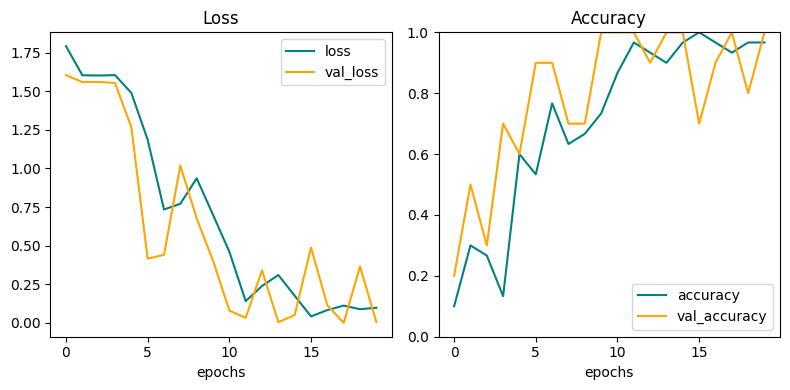

Modal: 5
drive/MyDrive/AI/training_set_for_each_digit/5_classification
Found 50 files belonging to 5 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_37 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_38 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_9

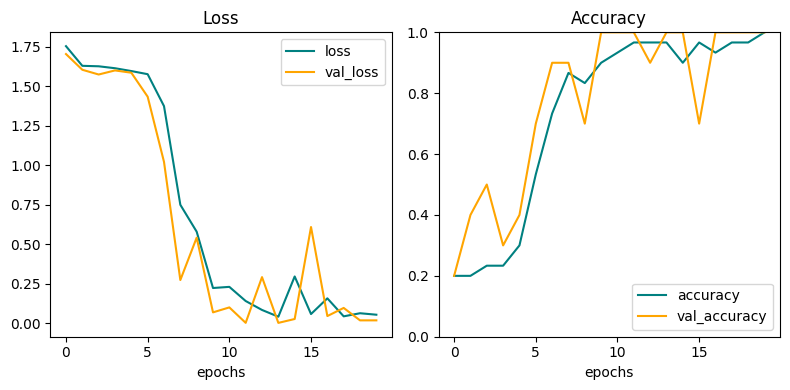

Modal: 6
drive/MyDrive/AI/training_set_for_each_digit/6_classification
Found 50 files belonging to 5 classes.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_41 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_42 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

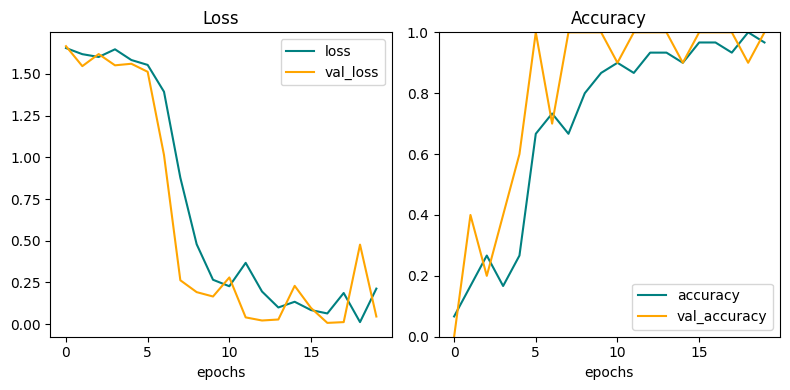

Modal: 7
drive/MyDrive/AI/training_set_for_each_digit/7_classification
Found 50 files belonging to 5 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_45 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_46 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

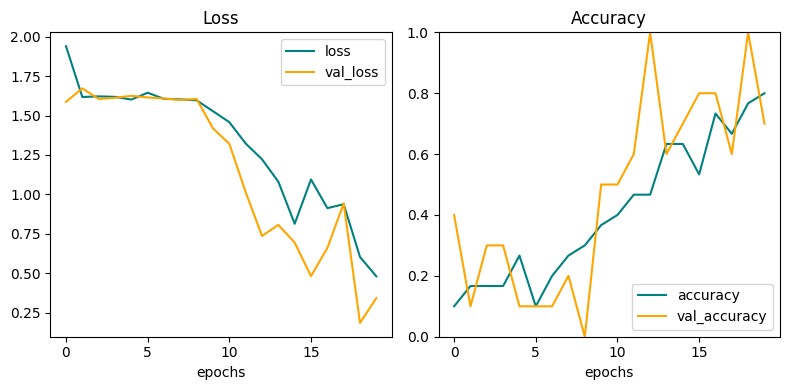

Modal: 8
drive/MyDrive/AI/training_set_for_each_digit/8_classification
Found 50 files belonging to 5 classes.
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_49 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_50 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

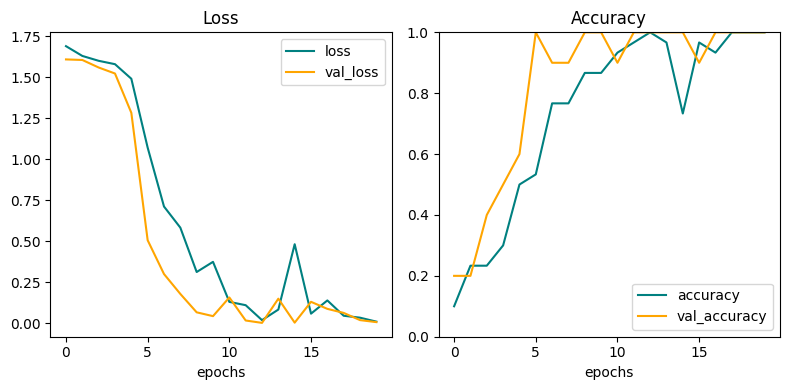

Modal: 9
drive/MyDrive/AI/training_set_for_each_digit/9_classification
Found 50 files belonging to 5 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_53 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_54 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

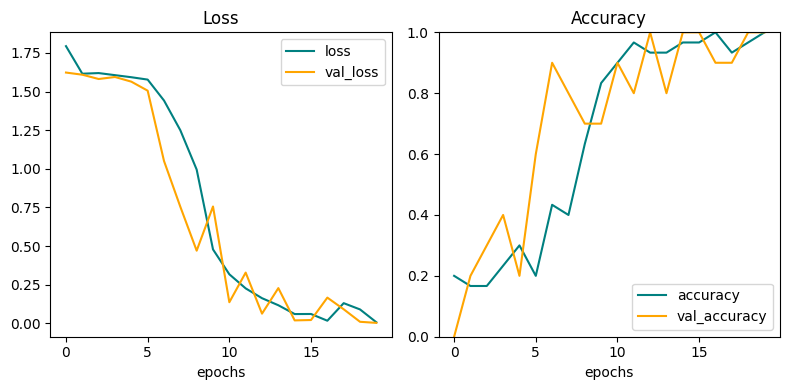

In [30]:
for i in range(10):
  print(f'Modal: {i}')
  curr_dir = f'{data_dir}/{i}_classification'
  print(curr_dir)
  data = tf.keras.utils.image_dataset_from_directory(curr_dir, batch_size=10, image_size=(28, 28))

  data = data.map(lambda x, y: (x/255, y))
  scaled_iterator = data.as_numpy_iterator()
  batch = scaled_iterator.next()

  train_size = int(len(data)*.7)
  val_size = int(len(data)*.2)
  test_size = int(len(data)*.1)

  train = data.take(train_size)
  val = data.skip(train_size).take(val_size)
  test = data.skip(train_size + val_size).take(test_size)

  log_dir = 'drive/MyDrive/AI/log'
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

  model = Sequential()

  model.add(Conv2D(128, (4, 4), 1, activation='relu', input_shape=(28, 28, 3)))
  model.add(Conv2D(128, (4, 4), 1, activation='relu'))
  model.add(Conv2D(128, (4, 4), 1, activation='relu'))
  model.add(Conv2D(128, (4, 4), 1, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  # sigmoid cannot be used as the output layer because it is not a binary classification

  model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
  # print(hist.history)

  # model.save(os.path.join('drive/MyDrive/AI/models', f'handwriting_{i}_recognition_model.h5'))

  fig, axes = plt.subplots(1, 2, figsize=(8, 4))

  axes[0].plot(hist.history['loss'], color='teal', label='loss')
  axes[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
  axes[0].set_xlabel('epochs')
  axes[0].set_title('Loss', fontsize=12)
  axes[0].legend(loc="upper right")

  axes[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
  axes[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
  axes[1].set_xlabel('epochs')
  axes[1].set_title('Accuracy', fontsize=12)
  axes[1].set_ylim(0, 1)
  axes[1].legend(loc="lower right")

  plt.tight_layout()
  plt.show()